# Problem Set 1 CS129.18

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

import warnings

#warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

## 1. What is the dimensionality or shape of the data?

In [2]:
weather = pd.read_csv('PH_Weather_v1.csv')

In [3]:
weather.shape

(90565, 11)

The data has **90565 rows** and **11 columns**.

## 2. What is the mean temperature for the year 2017?

In [4]:
weather.head(1)

,datetime,wind_direction,wind_speed,gust_speed,sea_level_pressure,temperature,altitude,precipitation,clouds,visibility,humidity
0,197809140300,160,2,NaN,1007.7,30,NaN,NaN,BKN,15.6,0.75


In [5]:
# Convert datetime column data type from integer to string
weather['datetime'] = list(map(str,weather['datetime']))

In [6]:
print('Mean temperature for the year 2017:')
weather[weather['datetime'].str.startswith('2017')]['temperature'].mean()

Mean temperature for the year 2017:


27.93335635359116

# 3. Solve for the beta coefficients for the columns that you can use in your dataset to predict temperature.

Some columns are mostly empty.

In [98]:
weather = pd.read_csv('PH_Weather_v1.csv')
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90565 entries, 0 to 90564
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            90565 non-null  int64  
 1   wind_direction      90565 non-null  int64  
 2   wind_speed          90565 non-null  int64  
 3   gust_speed          1 non-null      float64
 4   sea_level_pressure  90565 non-null  float64
 5   temperature         90565 non-null  int64  
 6   altitude            0 non-null      float64
 7   precipitation       13 non-null     float64
 8   clouds              90565 non-null  object 
 9   visibility          90565 non-null  float64
 10  humidity            90565 non-null  float64
dtypes: float64(6), int64(4), object(1)
memory usage: 7.6+ MB


Drop those columns including `clouds` because this is a categorical data, and therefore, cannot be used for linear regression.

In [7]:
weather.drop(['gust_speed','altitude','precipitation'],axis=1,inplace=True)

We are left with this dataset:

In [8]:
weather.head(3)

,datetime,wind_direction,wind_speed,sea_level_pressure,temperature,clouds,visibility,humidity
0,197809140300,160,2,1007.7,30,BKN,15.6,0.75
1,197810021500,0,0,1011.3,26,OVC,6.2,0.94
2,197810252100,360,9,1004.1,26,BKN,6.2,0.80


The month in which the data was recorded might provide information about the target variable.

In [101]:
# Extract month from `datetime`
# First, convert `datetime` to string from int
weather['datetime'] = list(map(str,weather['datetime']))

In [102]:
# Create month column and convert to integer
weather['month'] = list(map(lambda x: int(x[4:6]), weather['datetime']))

In [109]:
# Now the `datetime` column can be deleted
weather.drop('datetime',axis=1,inplace=True)

In [110]:
weather.head(3)

,wind_direction,wind_speed,sea_level_pressure,temperature,visibility,humidity,month
0,160,2,1007.7,30,15.6,0.75,9
1,0,0,1011.3,26,6.2,0.94,10
2,360,9,1004.1,26,6.2,0.80,10


Let's start creating the model.

In [112]:
# extract the predictors from the dataset
from sklearn.linear_model import LinearRegression

X = weather.drop("temperature", axis=1)

In [114]:
linear_model = LinearRegression()
linear_model.fit(X, weather["temperature"])

LinearRegression()

**Columns beta coefficients:**

In [120]:
pd.DataFrame(list(zip(X.columns, linear_model.coef_))).sort_values(1, ascending=False)

,0,1
3,visibility,0.103515
5,month,0.100466
1,wind_speed,0.082734
0,wind_direction,0.001698
2,sea_level_pressure,-0.000039
4,humidity,-11.642257


# 4. Show the relationship between the variable with the highest beta coefficient and temperature (Use a plot).

Text(0.5, 1.0, 'Visibility and Temperature')

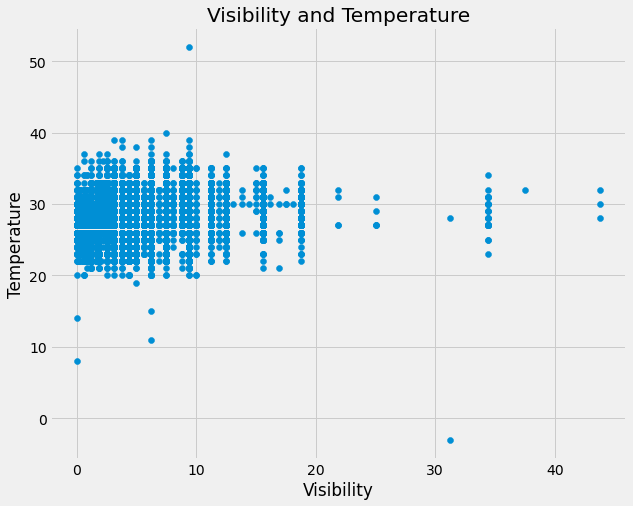

In [179]:
fig = plt.figure(figsize=(8,6))

axes = fig.add_axes([0,0,1,1])
axes.scatter(weather["visibility"], weather["temperature"])
axes.set_xlabel('Visibility')
axes.set_ylabel('Temperature')
axes.set_title('Visibility and Temperature')

> There is very small positive correlation between visibility and temperature.

Text(0.5, 1.0, 'Humidity and Temperature')

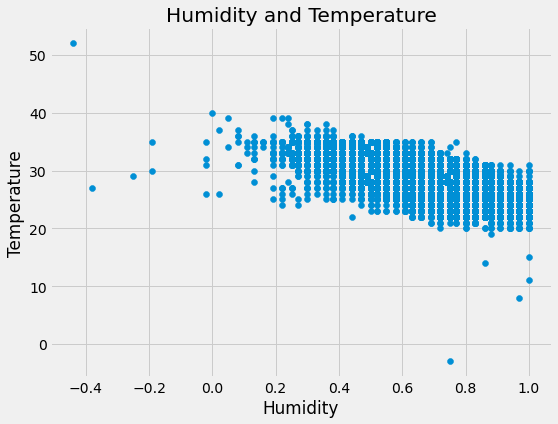

In [209]:
fig = plt.figure(figsize=(8,6))

axes = fig.add_subplot()
axes.scatter(weather["humidity"], weather["temperature"])
axes.set_xlabel('Humidity')
axes.set_ylabel('Temperature')
axes.set_title('Humidity and Temperature')

In [205]:
np.mean(weather["temperature"])

27.927687296416938

> Humidity is negatively correlated with temperature.

# 5. Solve for the Mean Squared Error of your predicted temperature against the actual temperature.

In [132]:
predictions = linear_model.predict(X)

In [276]:
weather['pred'] = predictions
weather.sample(10)

,wind_direction,wind_speed,sea_level_pressure,temperature,visibility,humidity,month,pred
49084,90,7,1007.0,27,4.4,0.86,11,26.925381
31817,250,7,1010.5,30,3.1,0.77,3,27.306480
8487,80,2,1004.0,25,6.2,0.94,6,25.247458
80582,0,0,1013.2,25,6.2,0.72,2,27.105201
77758,180,4,1014.7,26,6.2,0.80,3,26.910860
26166,90,2,1009.3,26,0.9,0.83,12,26.599052
87356,0,0,1008.9,27,7.5,0.83,7,26.461618
71358,40,9,1011.5,27,6.2,0.80,11,27.890622
74292,110,4,1012.4,27,6.2,0.72,11,28.527177
73619,40,2,1009.0,26,5.0,0.91,9,25.705780


Computing for the MSE:

In [232]:
from sklearn import metrics

In [241]:
print('MSE =', metrics.mean_squared_error(weather["temperature"], weather['pred']))

MSE = 2.6591894020336486


In [243]:
print('RMSE =', np.sqrt(metrics.mean_squared_error(weather["temperature"], weather['pred'])))

RMSE = 1.6307021193441948


# 6. Solve for the R^2 score of the linear model used to predict temperature.

In [210]:
from sklearn import metrics

In [229]:
print('R2 score:')
metrics.r2_score(weather['temperature'], weather['pred'])

R2 score:


0.4934953753747926

# 7. Identify if the model is a good model and why.

Text(0.5, 1.0, 'Actual vs Predicted Temperature')

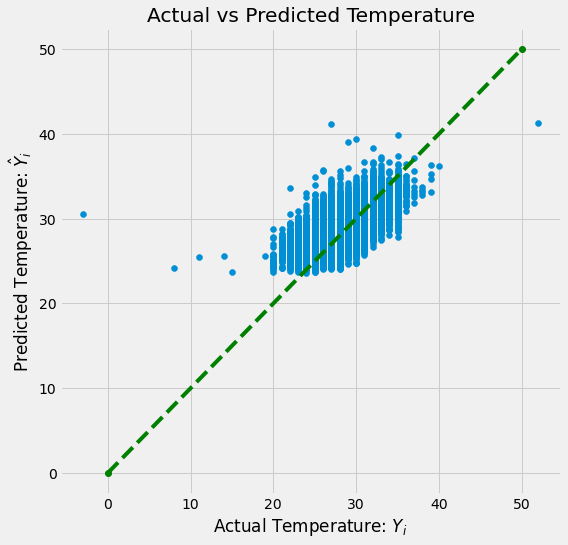

In [245]:
plt.figure(figsize=(8,8))


plt.scatter(weather["temperature"], linear_model.predict(X))
plt.plot([0, 50], [0, 50], '--go')
plt.xlabel("Actual Temperature: $Y_i$")
plt.ylabel("Predicted Temperature: $\hat{Y}_i$")
plt.title("Actual vs Predicted Temperature")

The plot above shows that the model had trouble predicting temperatures below 20°C and those above 40 °C. The histogram below shows that these temperatures are far from the mean temperature. This error in prediction is reflected by the model's `R2 score` of 0.49. It means that only 49% of the data fitted into the regression model.

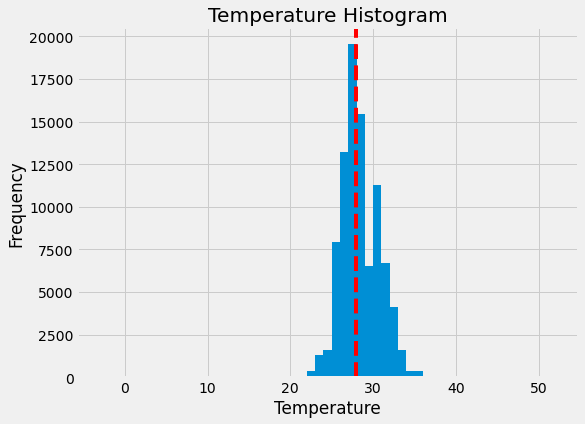

In [273]:
fig = plt.figure(figsize=(8,6))

axes = fig.add_subplot()
axes.hist(weather["temperature"], bins = 55)
axes.set_xlabel('Temperature')
axes.set_ylabel('Frequency')
axes.set_title('Temperature Histogram')
axes.axvline(x=np.mean(weather['temperature']),color='r',ls='--')

The linear regression model has low `MSE = 2.66`. Taking the square root of the MSE will give the root mean squared error (RMSE) which, in this case, is equal to `1.63 °C`. RMSE is the standard deviation of the residuals (how far the actual data is from the prediction data). RMSE measures how spread apart these residuals are. It is also an intuitively easy to understand metric since it has the same unit as the target variable. A value of `1.63 °C` for RMSE is a good value.

All things considered, the model still performed well in predicting the target variable, especially in terms of `MSE` and `RMSE`. The `R2 score` is also not that bad. Considering that atmospheric temperature is driven by complex and multiple factors, I'd say that the **model is good** enough.